# UVXY explained

We will be exploring how UVXY can be used as part of a trading strategy. We will first be discussing VIX, followed by VXX and then finally UVXY.

## Understanding VIX

VIX.md: Explain what the VIX (Volatility Index) is, why it's referred to as the "fear gauge," and how it measures market expectations of volatility.
Subsections:

What is the VIX?
Definition and background.

How the VIX is Calculated
Overview of the calculation process using S&P 500 options.

Why the VIX Matters
Discussion on why traders monitor the VIX and its impact on the market.

How Traders Use the VIX
Example strategies that involve the VIX, such as hedging or volatility trading.


[*********************100%%**********************]  1 of 1 completed


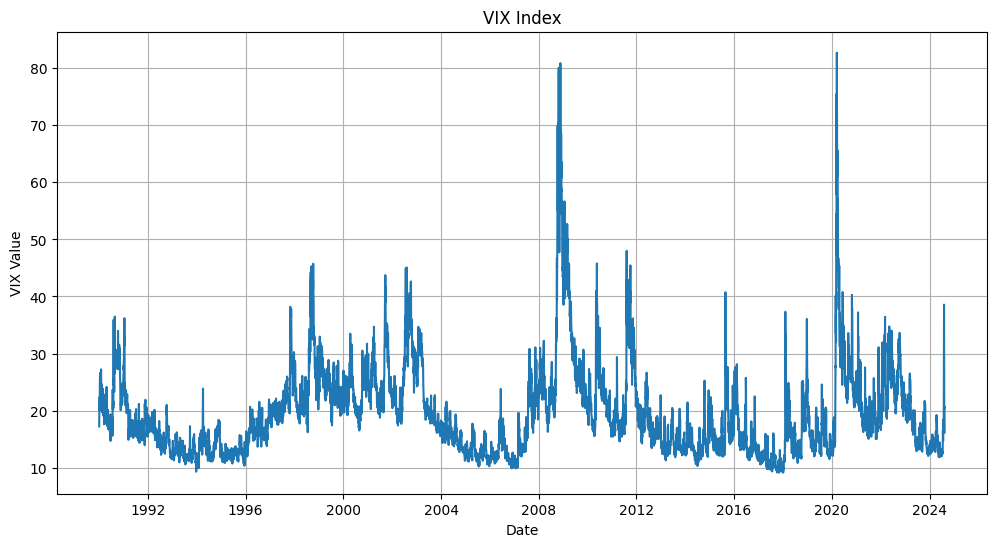

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch VIX data from yfinance
vix = yf.download('^VIX', start='1990-01-01')

# Plot the VIX data
plt.figure(figsize=(12, 6))
plt.plot(vix['Close'])
plt.title('VIX Index')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.grid(True)
plt.show()

## Understanding VXX
VXX.md: Introduce VXX, the iPath Series B S&P 500 VIX Short-Term Futures ETN.
Subsections:

What is VXX?
Overview of VXX and its role as a short-term futures ETN.

How VXX Tracks the VIX
Explanation of how VXX attempts to track short-term VIX futures.

The Role of Contango and Backwardation
Discuss how these futures market concepts affect the performance of VXX.

Common Trading Strategies Using VXX
Examples of how traders might use VXX in their portfolios, including long and short strategies.

## Understanding UVXY
UVXY.md: Explain what UVXY is, how it works, and its role as a leveraged ETF.
Subsections:

What is UVXY?
Introduction to UVXY as a leveraged ETF that aims to return 1.5x the performance of the S&P 500 VIX Short-Term Futures Index.

How UVXY is Structured
Overview of the underlying assets, rebalancing mechanism, and leverage.

Risks and Rewards
Detailed discussion of the risks associated with holding UVXY, including decay and volatility drag.

Trading Strategies Involving UVXY
Explore specific strategies, such as day trading, hedging, and mean reversion.

# Notes
Figure out what i need to put in the python programs